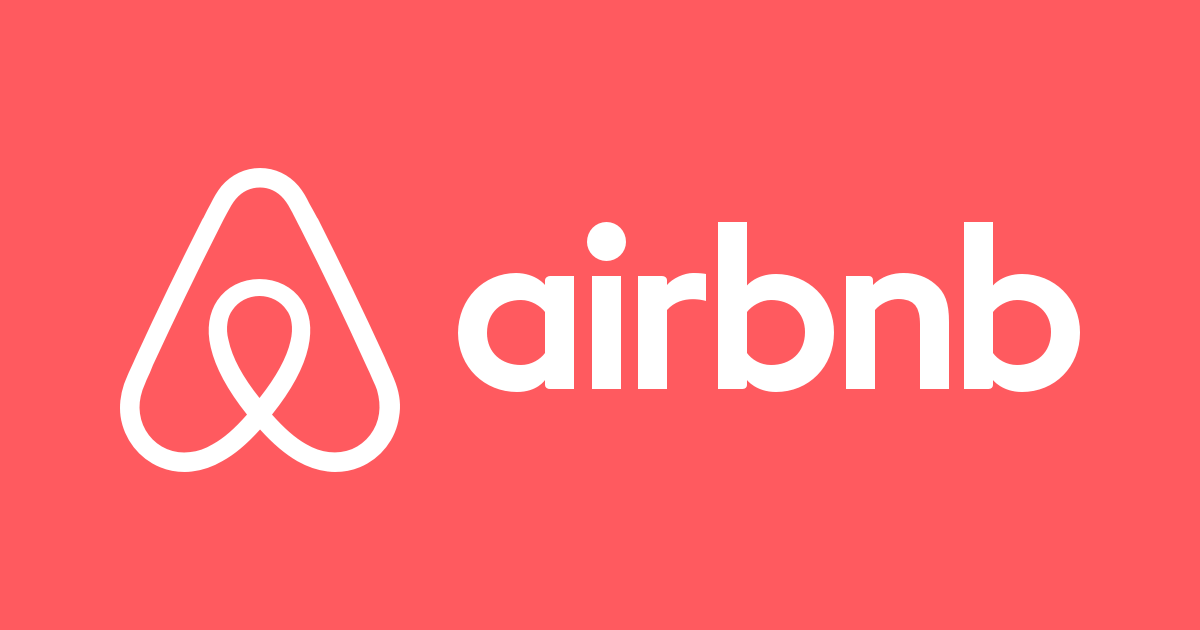

### **Business Context**

---

Since 2008, Airbnb has enabled guests and hosts to broaden travel opportunities and offer a more distinctive, personalized way of experiencing the world. Today, Airbnb stands as a unique service that is widely used and recognized across the globe. Analyzing data from millions of listings on Airbnb plays a vital role for the company. These vast listings produce a significant amount of data—data that can be analyzed to enhance security, support business decisions, understand the behavior and performance of both customers and hosts, guide marketing strategies, implement innovative additional services, and much more.

The dataset consists of approximately 49,000 records with 16 columns, comprising a mix of categorical and numerical values. Let’s explore and analyze this data to uncover key insights.

---



---



### **Project Architecture**



---



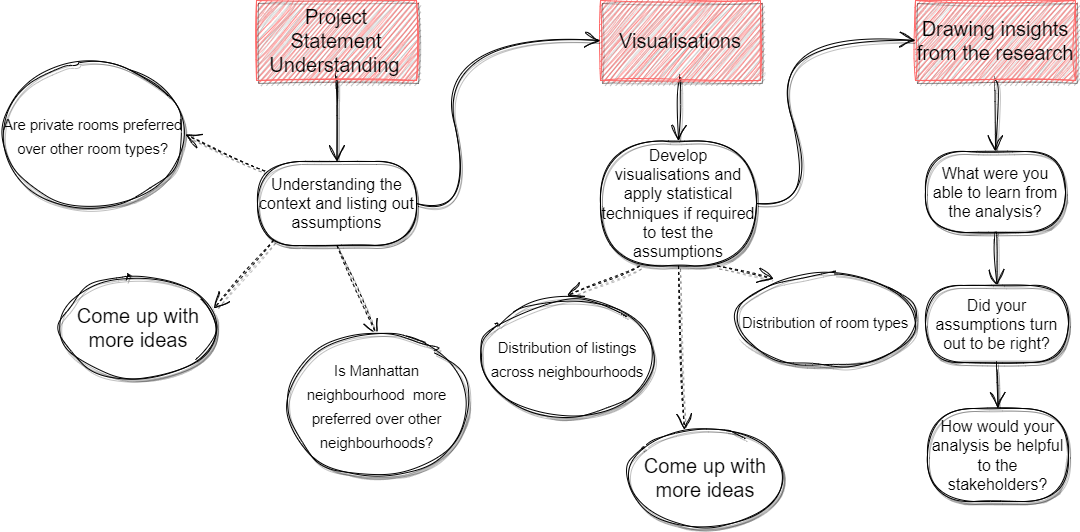

### **Feature information in details**

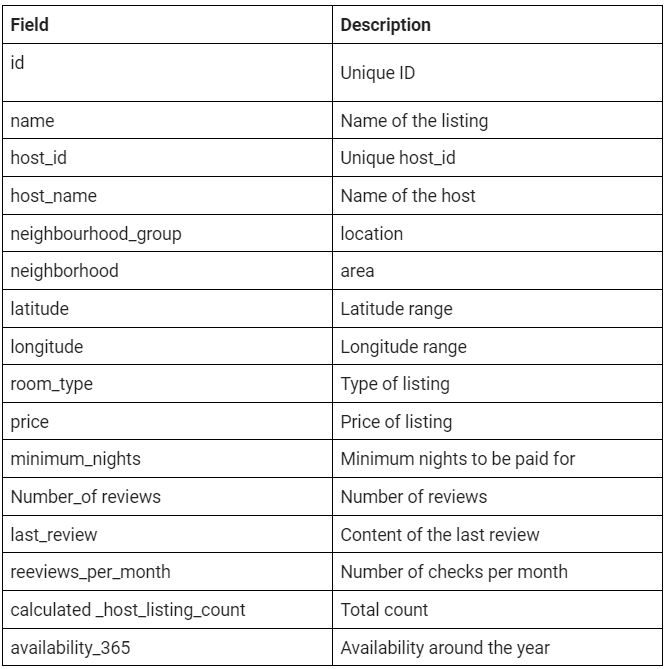

### **Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### **Taking a look at the first five rows to see how data is**

In [ ]:
#reading the dataset
from google.colab import drive
drive.mount("/content/drive")

path="/content/Airbnb NYC 2019.csv"

booking_df=pd.read_csv(path)


booking_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Checking the shape of the dataset shows how many rows and columns**

In [ ]:
print(f'This dataset has {booking_df.shape} rows and columns respectively.')

This dataset has (48895, 16) rows and columns respectively.


### **info( ) gives a good overall information about the missing values and the data type of the every column**

In [ ]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### **Checking for the null values and null values percentage & Visually representing it**

In [ ]:
booking_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

 **calculating the percentage of missing values for each column**

In [ ]:
round(booking_df.isnull().sum()/len(booking_df) * 100, 2)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

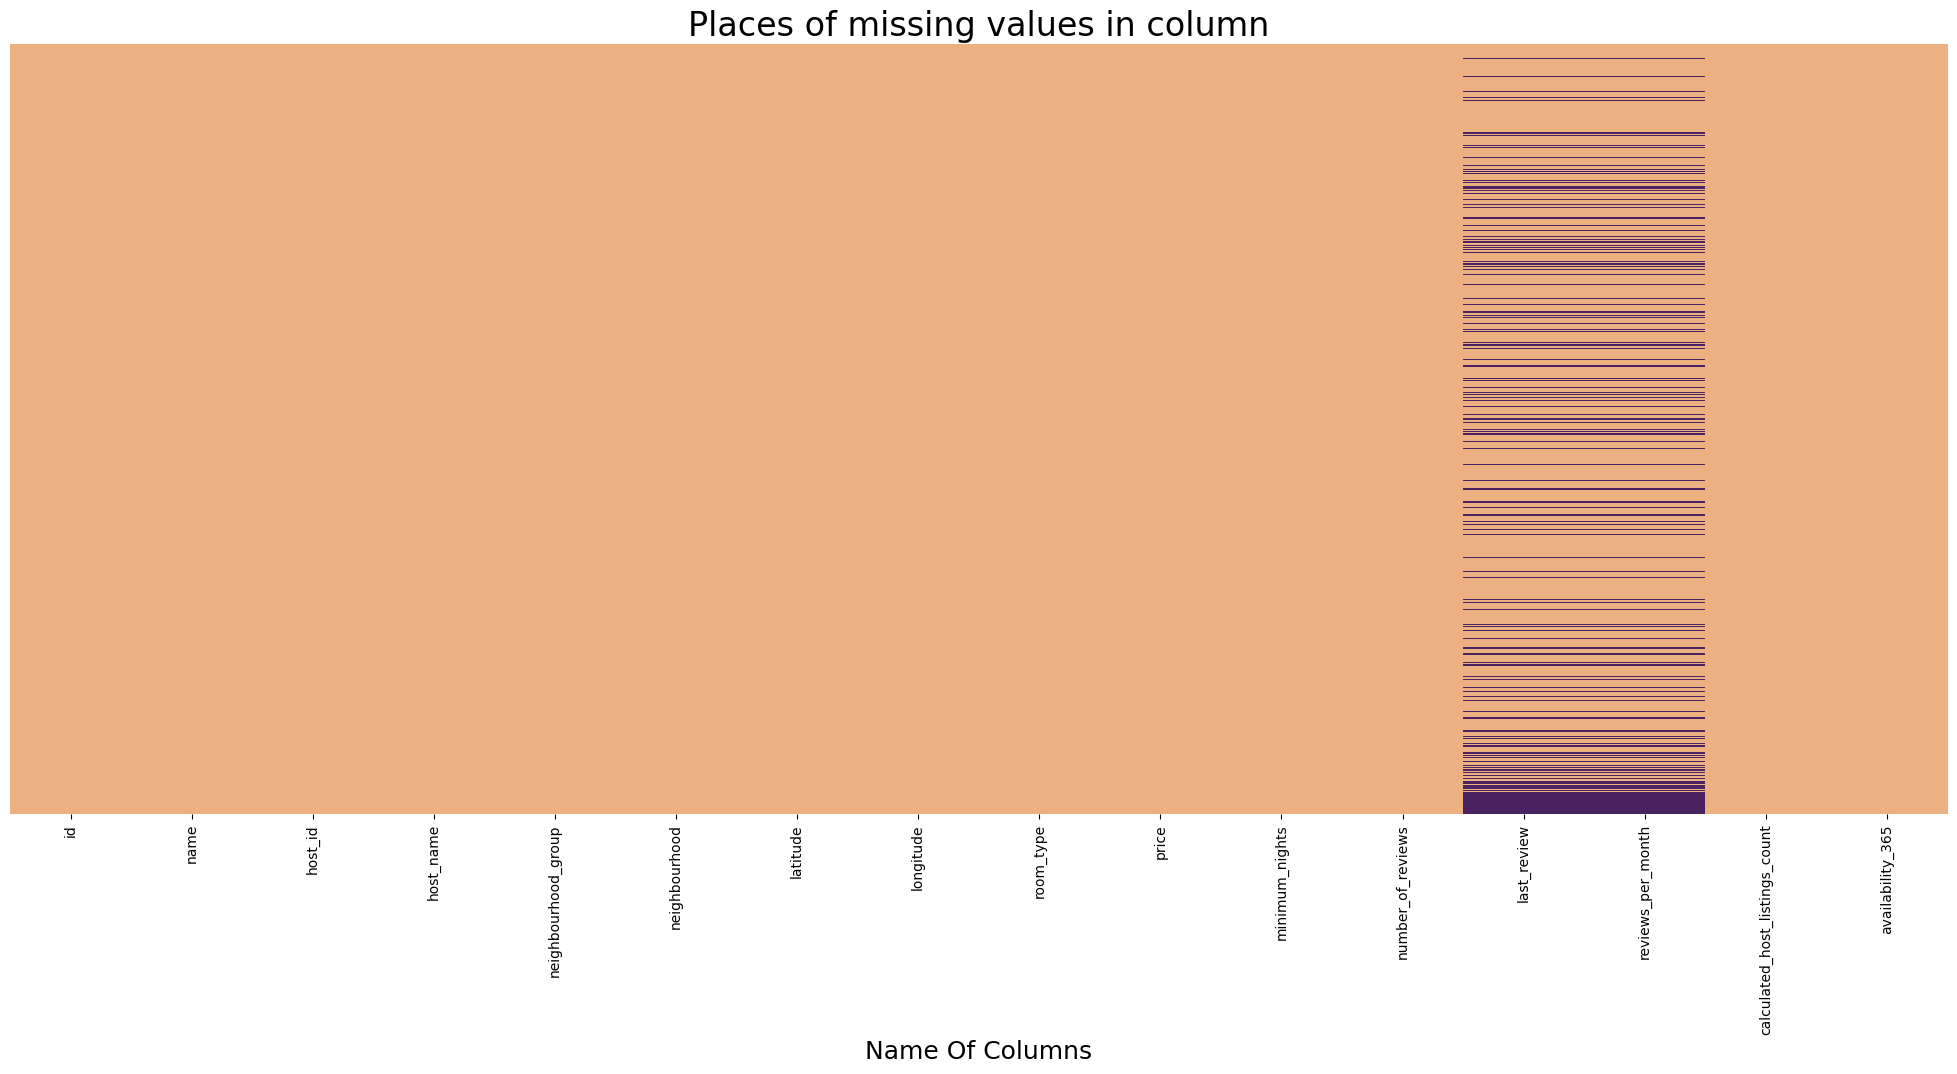

In [ ]:
# Visulaizing null values through heatmap.

plt.figure(figsize=(25, 10))
sns.heatmap(booking_df.isnull(), cbar=False, yticklabels=False,cmap='flare')
plt.xlabel("Name Of Columns", fontsize=18)
plt.title("Places of missing values in column", fontsize=24)
plt.show()

**As we can see from above the column 'name', 'host_name', 'last_review', 'reviews_per_month' has the missing values**

### **The describe( ) method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column:**
**count** - The number of not-empty values. <br>
**mean** - The average (mean) value. <br>
**std** - The standard deviation.

In [ ]:
booking_df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

### **I'm copying the dataframe to keep the original safe and conduct the missing value check and EDA going forward**

In [ ]:
booking_df1 = booking_df.copy()

In [ ]:
# Checking the duplicates

booking_df1.duplicated().sum()

np.int64(0)

**We have 0 duplicated values**

### **Either we can drop the null values or we can fill it as per the requirement and I'm going to drop the 'ID' column as it's not needed for this project and fill the rest of the columns column 'name', 'host_name', 'last_review', 'reviews_per_month'**

In [ ]:
booking_df1.drop('id', axis = 1, inplace = True)
booking_df1.fillna({'name' : 'No_Name'}, inplace = True )
booking_df1.fillna({'host_name' : 'No_Name'}, inplace = True )
booking_df1.fillna({'last_review' : 'Not_Revieved'}, inplace = True )
booking_df1.fillna({'reviews_per_month' : 0}, inplace = True )

In [ ]:
booking_df1.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
booking_df1.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Missing Value Treatment is done for the dataset.**

### **Let's Get on With the EDA**

### **1. Which 'neighbourhood_group' has the highest number of AirBnb's ?**

In [ ]:
#checking the unique values of the neighbourhood_group

booking_df1['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

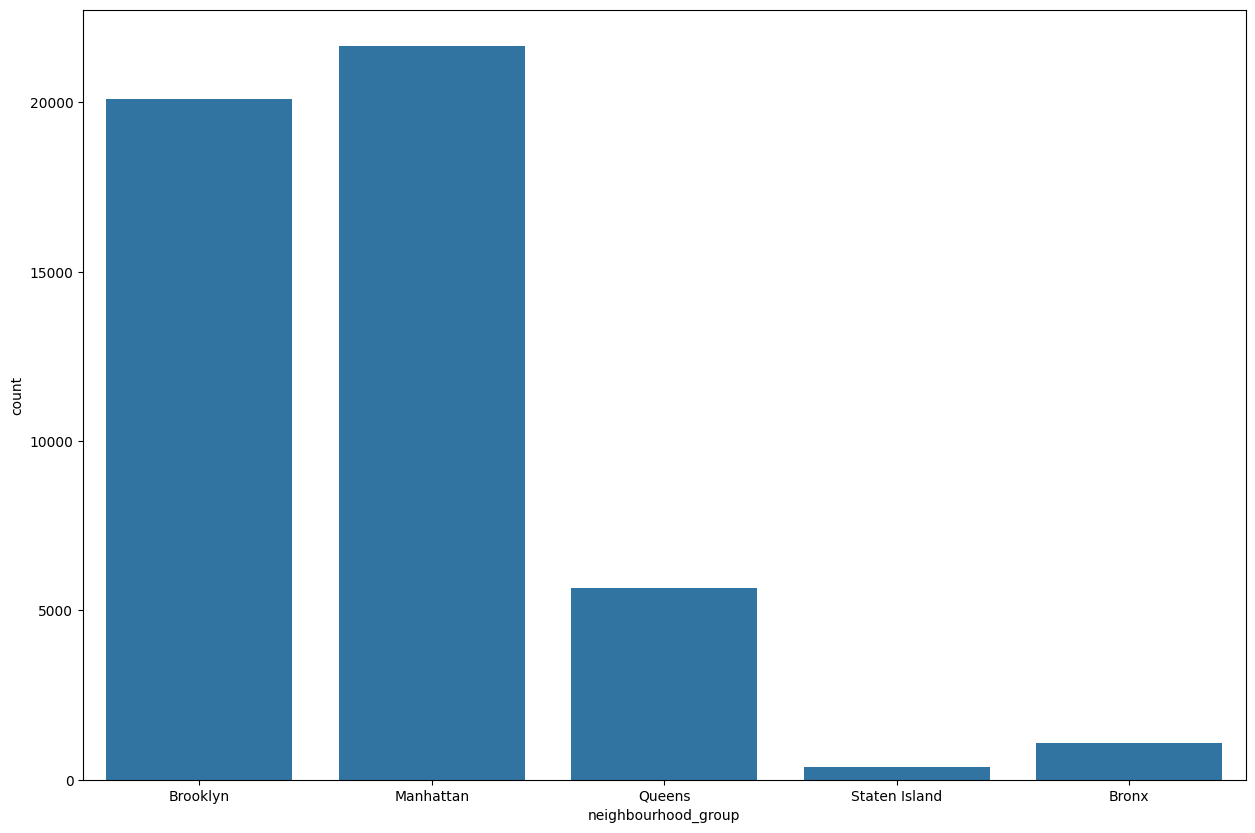

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(data=booking_df1, x='neighbourhood_group')
plt.show()

In [ ]:
neighbourhood_group_counts = booking_df1['neighbourhood_group'].value_counts().reset_index()

# Rename the columns for better readability
neighbourhood_group_counts.columns = ['Neighbourhood Group', 'Count']

# Display the table
print(neighbourhood_group_counts)

  Neighbourhood Group  Count
0           Manhattan  21661
1            Brooklyn  20104
2              Queens   5666
3               Bronx   1091
4       Staten Island    373


**As we can see from the bar chart above Manhattan neighbourhood has the highest number of AirBnb's**

1. Manhattan         (21661)
2. Brooklyn          (20104)
3. Queens            (5666)
4. Bronx             (1091)
5. Staten Island     (373)

And Manhattan and Brooklyn has more than 75% of the AirBnb's.

In [ ]:
#Calculating the precise percentage AirBnb's are there in Manhattan and Brooklyn

neighbourhood = booking_df1.groupby('neighbourhood_group')['neighbourhood_group'].count()
neighbourhood = pd.DataFrame(neighbourhood)
neighbourhood.rename(columns = {'neighbourhood_group' : 'No of AirBnbs'}, inplace = True)
neighbourhood

No of AirBnbs
neighbourhood_group               
Bronx                         1091
Brooklyn                     20104
Manhattan                    21661
Queens                        5666
Staten Island                  373

In [ ]:
neighbourhood/(sum(neighbourhood['No of AirBnbs'] / 100))

No of AirBnbs
neighbourhood_group               
Bronx                     2.231312
Brooklyn                 41.116679
Manhattan                44.301053
Queens                   11.588097
Staten Island             0.762859



**Now Precisely we can 85.41 ~ 86% AirBnb's are there in Manhattan and Brooklyn**

### **2. Which type of properties are there in all the neighbourhood ?**

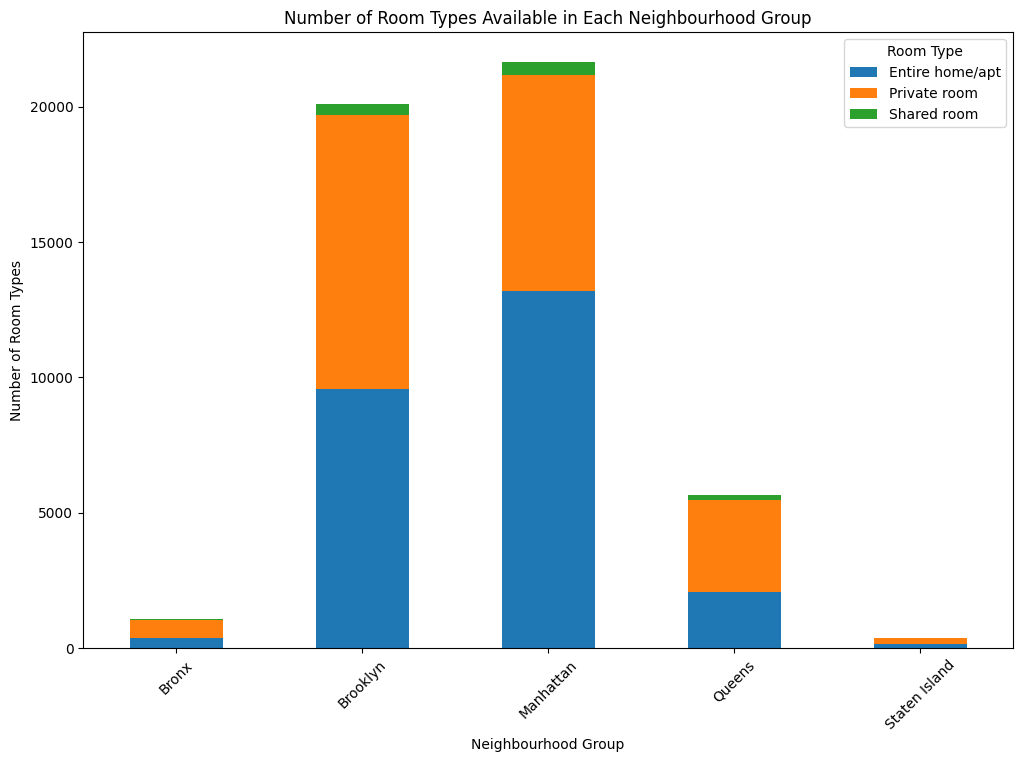

In [ ]:
# Group by neighbourhood group and room type and count the occurrences
room_type_counts = booking_df1.groupby(['neighbourhood_group', 'room_type']).size().unstack(fill_value=0)

# Plot the data
room_type_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Room Types')
plt.title('Number of Room Types Available in Each Neighbourhood Group')
plt.legend(title='Room Type')
plt.xticks(rotation=45)

# Show the plot
plt.show()

1. **Brooklyn** has Highest number of **Private Rooms**

2. **Manhattan** has Highest number of **Entire Home/Apartment**

3. **Manhattan** has Highest number of **Shared Room**

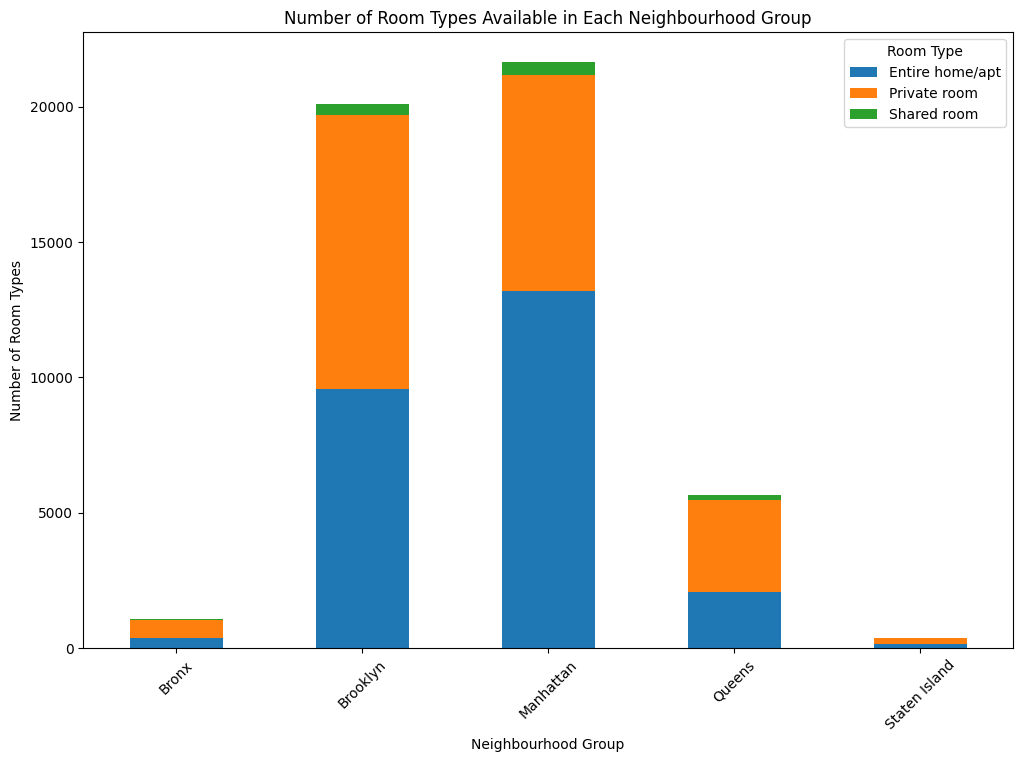

In [ ]:
# Group by neighbourhood group and room type and count the occurrences
room_type_counts = booking_df.groupby(['neighbourhood_group', 'room_type']).size().unstack(fill_value=0)

# Plot the data
room_type_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Room Types')
plt.title('Number of Room Types Available in Each Neighbourhood Group')
plt.legend(title='Room Type')
plt.xticks(rotation=45)

# Show the plot
plt.show()

### **3. Which properties are the busiest Host in terms of Number of Bookings ?**

In [ ]:
# return which host has the highest bookings

highest_bookings= booking_df.groupby(['neighbourhood_group','name'])['name'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

top_ten_highest_bookings= highest_bookings[:10]

top_ten_highest_bookings

neighbourhood_group                                        name  \
44574              Queens                              Hillside Hotel   
5259             Brooklyn                          Brooklyn Apartment   
12120            Brooklyn            Loft Suite @ The Box House Hotel   
2826             Brooklyn  Artsy Private BR in Fort Greene Cumberland   
15315            Brooklyn                Private room in Williamsburg   
3381             Brooklyn               Beautiful Brooklyn Brownstone   
44610              Queens                         Home away from home   
15272            Brooklyn                    Private room in Brooklyn   
7665             Brooklyn                     Cozy Brooklyn Apartment   
29998           Manhattan                                  Harlem Gem   

       Most_Bookings  
44574             18  
5259              12  
12120             11  
2826              10  
15315              8  
3381               8  
44610              8  
15272              8  
7665               8  
29998              7

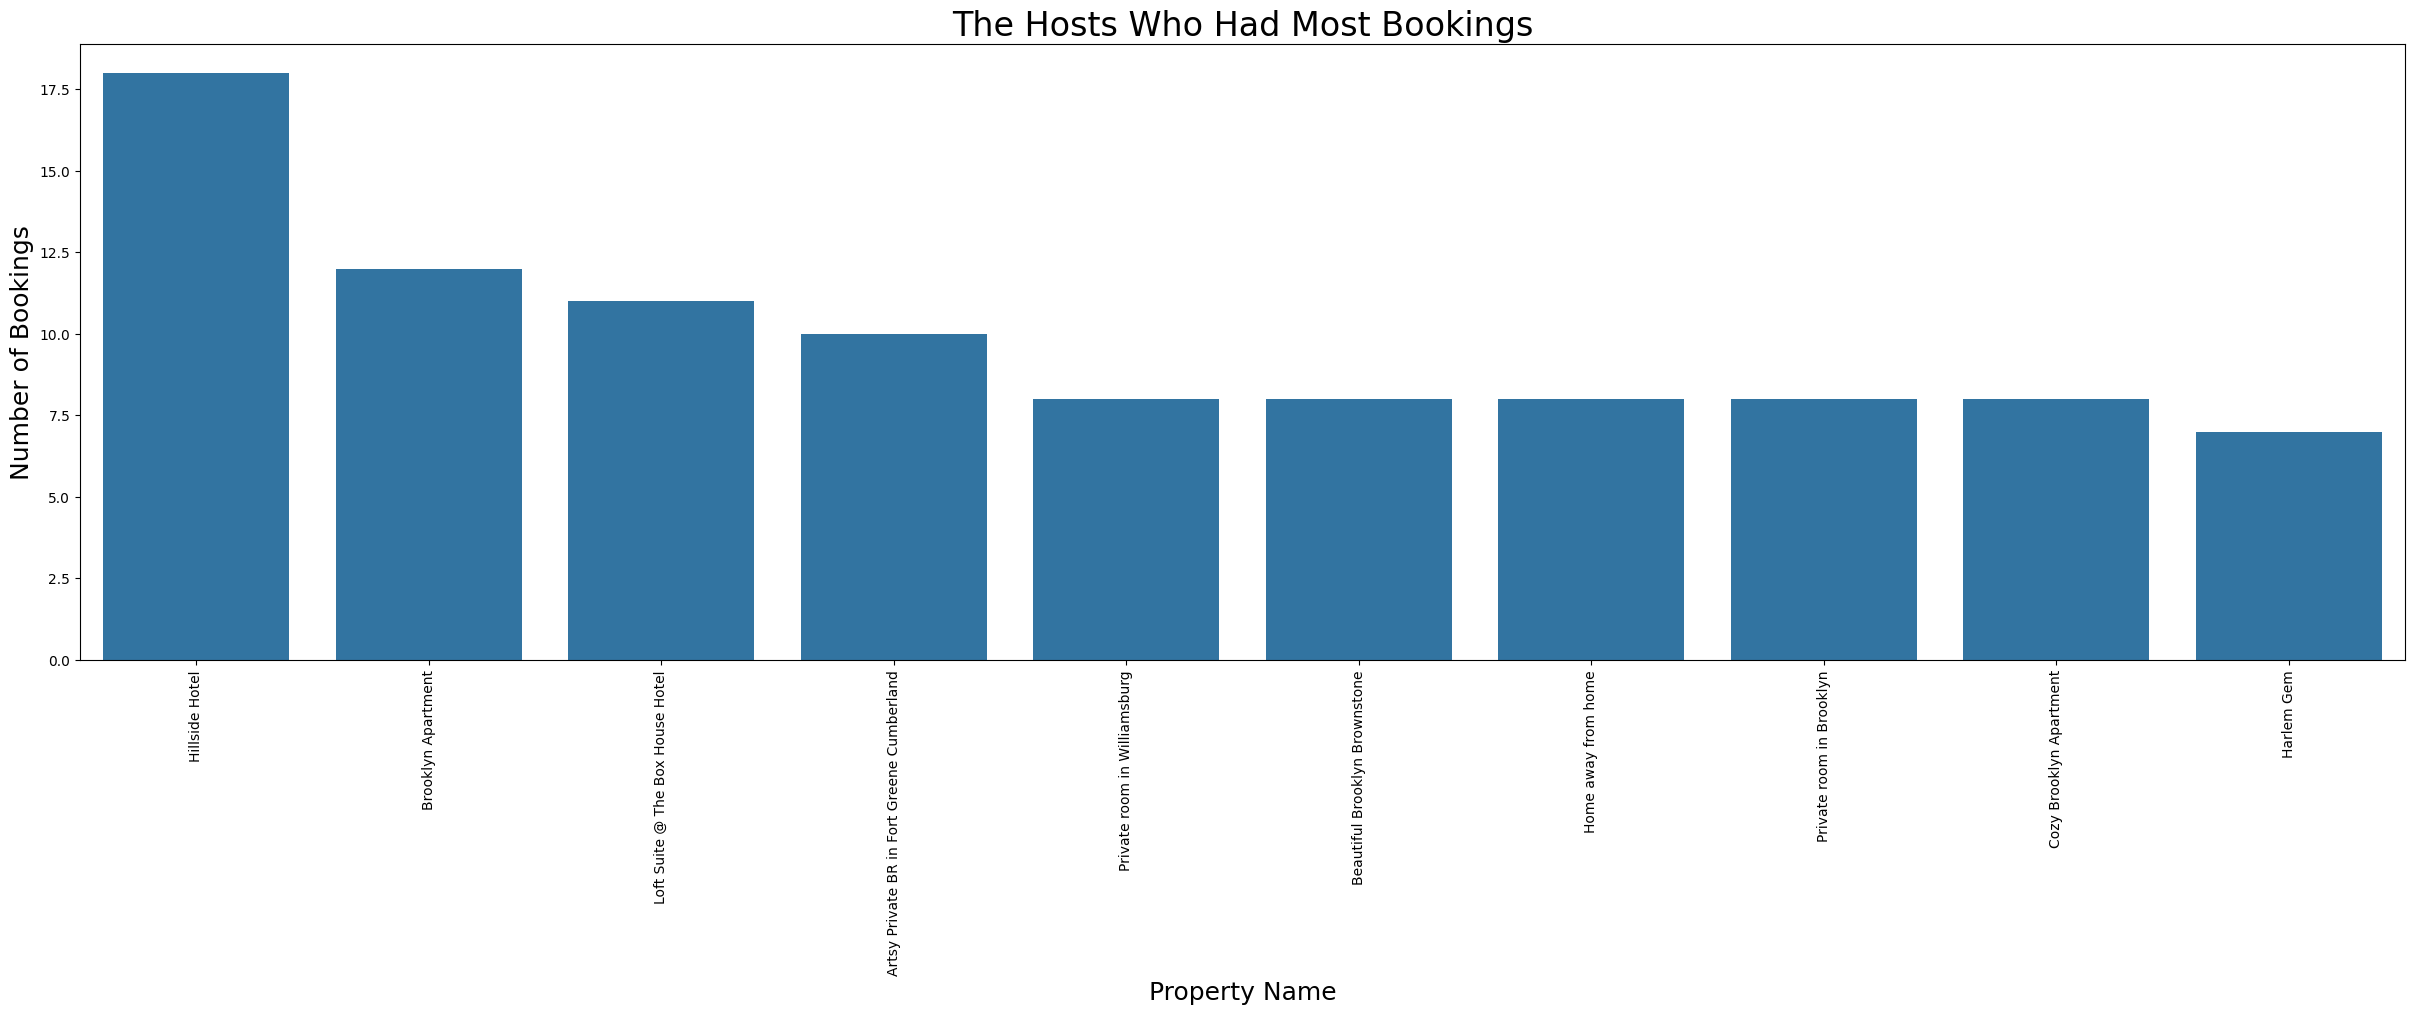

In [ ]:
#Visualizaing the top_ten_highest_bookings

plt.figure(figsize=(30,8))
sns.barplot(x = top_ten_highest_bookings['name'],y = top_ten_highest_bookings['Most_Bookings'])
plt.xlabel('Property Name', fontsize = 18)
plt.xticks(rotation = 90)
plt.ylabel('Number of Bookings',fontsize = 18)
plt.title("The Hosts Who Had Most Bookings",fontsize = 24)
plt.show()

**As we can see from above Hillside Hotel property in Queens had the most number of bookings followed by Brooklyn Apartment in Brooklyn and Loft Suite at Brooklyn.**

### **4. Who are the busiest Host in terms of Number of Bookings with host name ?**

In [ ]:
host = booking_df1[['neighbourhood_group','host_name']].value_counts().reset_index().head(10)
host.rename(columns = {0 : 'Most_Bookings'}, inplace = True)
host

neighbourhood_group     host_name  count
0           Manhattan  Sonder (NYC)    327
1           Manhattan    Blueground    230
2           Manhattan       Michael    212
3           Manhattan         David    202
4            Brooklyn       Michael    159
5           Manhattan          John    151
6            Brooklyn         David    142
7           Manhattan          Kara    135
8           Manhattan          Alex    134
9           Manhattan          Mike    134

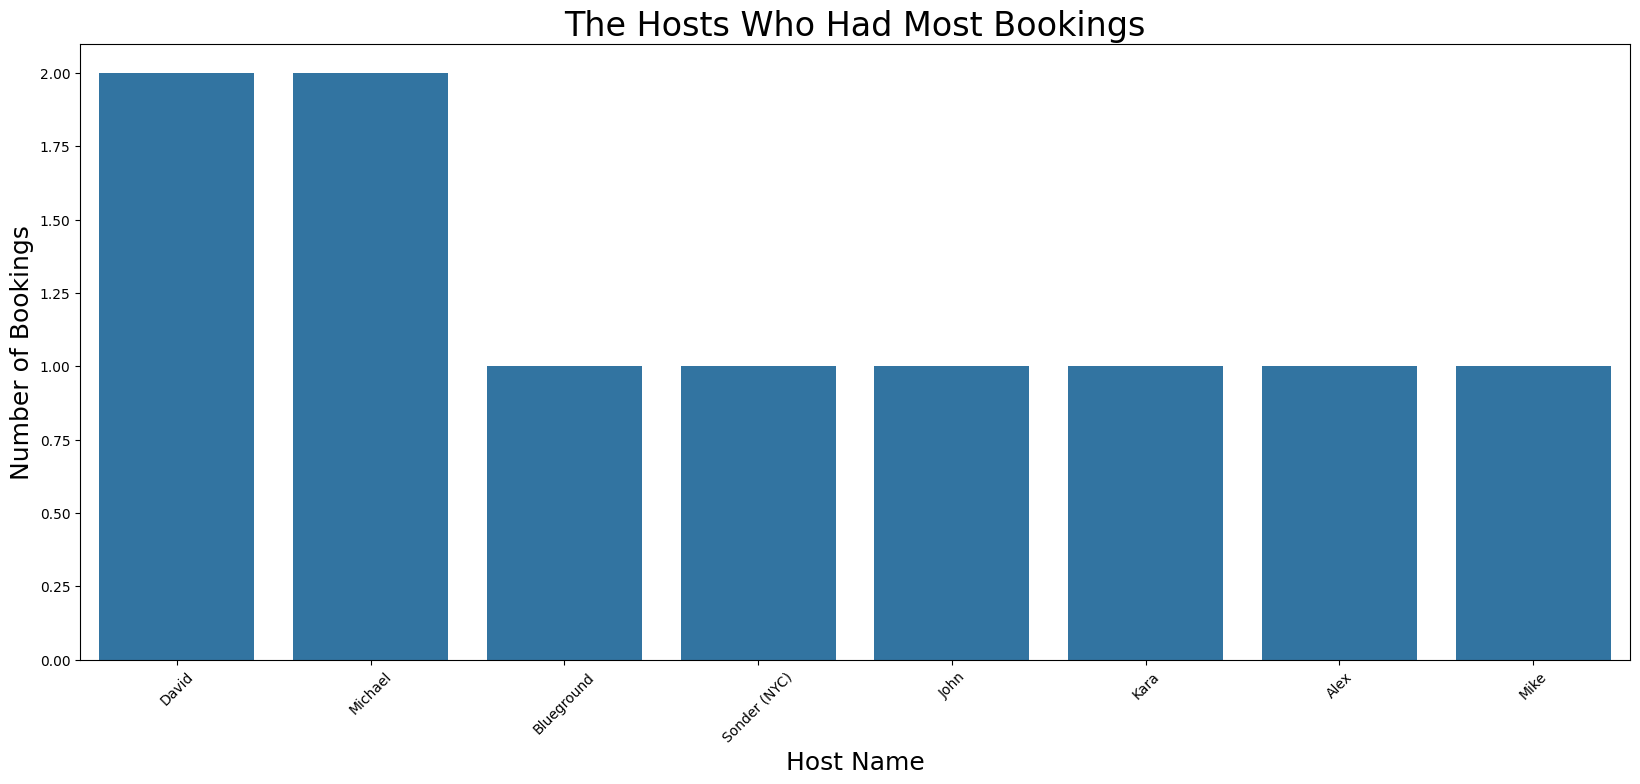

In [34]:
# Create a new DataFrame with host name and number of bookings
host_bookings = host['host_name'].value_counts().reset_index()
host_bookings.columns = ['host_name', 'Most_Bookings']

# Plotting
plt.figure(figsize=(20, 8))
sns.barplot(x='host_name', y='Most_Bookings', data=host_bookings)
plt.xlabel('Host Name', fontsize=18)
plt.ylabel('Number of Bookings', fontsize=18)
plt.title("The Hosts Who Had Most Bookings", fontsize=24)
plt.xticks(rotation=45)
plt.show()

**As observed above, David and Michael had the highest number of bookings.**

In [31]:
import plotly.express as px

In [32]:
brook_df = booking_df1.loc[booking_df1['neighbourhood_group'].isin(['Brooklyn', 'Manhattan', 'Queens', 'Bronx'])]

In [33]:
brook_df = booking_df1.loc[booking_df1['neighbourhood_group'].isin(['Brooklyn', 'Manhattan', 'Queens', 'Bronx'])]

# Group by neighbourhood group and calculate the mean price
grouped_df = brook_df.groupby(['neighbourhood_group']).value_counts().reset_index()

# Create the bar plot
fig = px.bar(
    data_frame=grouped_df,
    x='neighbourhood_group',
    y='price',
    text='price',
    color='neighbourhood_group',
    opacity=0.8
)

# Update the traces and layout
fig.update_traces(textfont=dict(size=15, color='Black'))
fig.update_layout(
    title='Neighborhood Based on Property Prices',
    yaxis=dict(showgrid=False, showticklabels=True),
    autosize=False,
    width=800,
    height=500
)

# Show the plot
fig.show()

#### **From the above bar chart we can conclude:**

1. **Brooklyn is neither the cheapest nor the most expensive neighborhood to stay in.**

2. **Manhattan is the costliest place to stay**

3. **The Bronx is the most affordable neighborhood for accommodation**

**From the above bar chart we can conclude:**

**1. Riverdale is the most expensive area to stay for both Private and Shared Rooms**

**2. City Island is the most expensive for Entire Home/ Apt**

**3. Cheapest or More Affordable Private room is available at Van Nest**

**4. Cheapest or More Affordable Shared room is available at Morris Heights, Pehlam Gardens, Schuylerville and Van Nest**

**5. Cheapest or More Affordable Entire Home/ Apt is available at Woodlawn**

### **8. Assume I stayed in Manhattan for 20 days & I had a balance amount of 5000$ only.Then I decided to stay other 20 days at Queens. Is this amount is sufficient only for room expenses?**

In [ ]:
queens_df = booking_df1.loc[booking_df1['neighbourhood_group'].isin(['Queens'])]
price = queens_df['price'].mean()*20
price = round(price, 2)

if price <= 5000:
    print(f'The average amount to stay in Queens for 20 days is {price} $. We think your amount is more than Sufficient to stay there.')
else:
    print("The amount exceeds your budget plan for room in Queens.")

The average amount to stay in Queens for 20 days is 1990.35 $. We think your amount is more than Sufficient to stay there.


### **9. Since money is sufficient stay for 20 days, which type of luxury property can you select to stay at Queens**

In [ ]:
luxury_df = queens_df.groupby(['room_type'])['price'].mean()
luxury_df

room_type
Entire home/apt    135.819715
Private room        77.503167
Shared room        114.595238
Name: price, dtype: float64

In [ ]:
my_labels = ('Entire home/apt', 'Private room', 'Shared room')

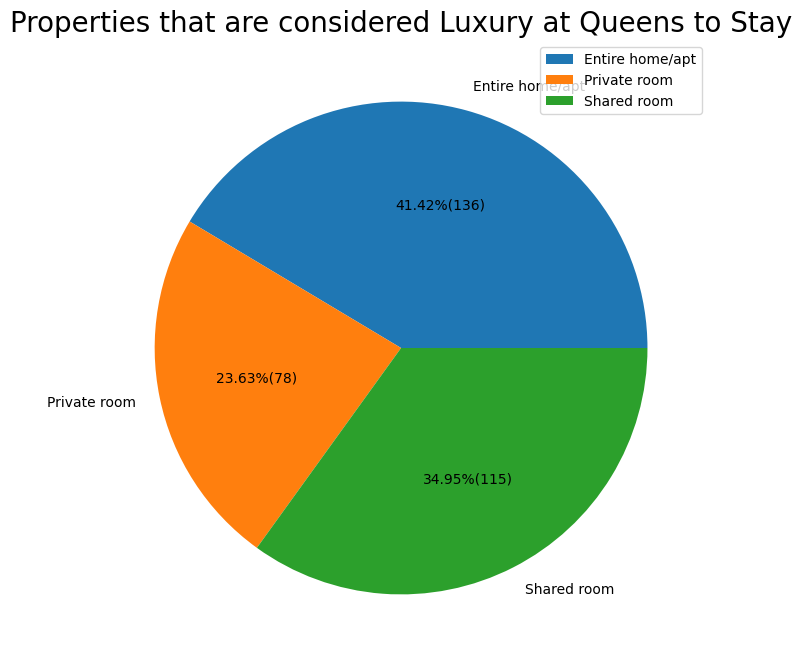

In [ ]:
plt.figure(figsize = (15,8))
plt.pie(luxury_df, labels = my_labels, autopct = lambda p: '{:.02f}%({:.0f})'.format(p,(p/100)*luxury_df.sum()))
plt.title('Properties that are considered Luxury at Queens to Stay', fontsize = 20)
plt.legend()
plt.show()

**Entire home/Apt is considered to be luxury in the Queens Neighborhod so staying there for 20 days is both affordable and luxurious at 147 $.**

### **10. Most visited properties based on number of reviews**

In [ ]:
booking_df1.loc[:,['name','number_of_reviews']].groupby(['name'])['number_of_reviews'].sum().sort_values(ascending=False)[:10].reset_index().rename(columns={'name': "Property Names" })

Property Names  number_of_reviews
0                            Room near JFK Queen Bed              629.0
1                         Great Bedroom in Manhattan              607.0
2                     Beautiful Bedroom in Manhattan              597.0
3                       Private Bedroom in Manhattan              594.0
4                            Room Near JFK Twin Beds              576.0
5                  Steps away from Laguardia airport              543.0
6           Manhattan Lux Loft.Like.Love.Lots.Look !              540.0
7  Cozy Room Family Home LGA Airport NO CLEANING FEE              510.0
8                 Private brownstone studio Brooklyn              488.0
9                   Loft Suite @ The Box House Hotel              481.0

In [ ]:
most_visited = booking_df1.groupby(['name'])['number_of_reviews'].sum().sort_values(ascending=False)[:10]

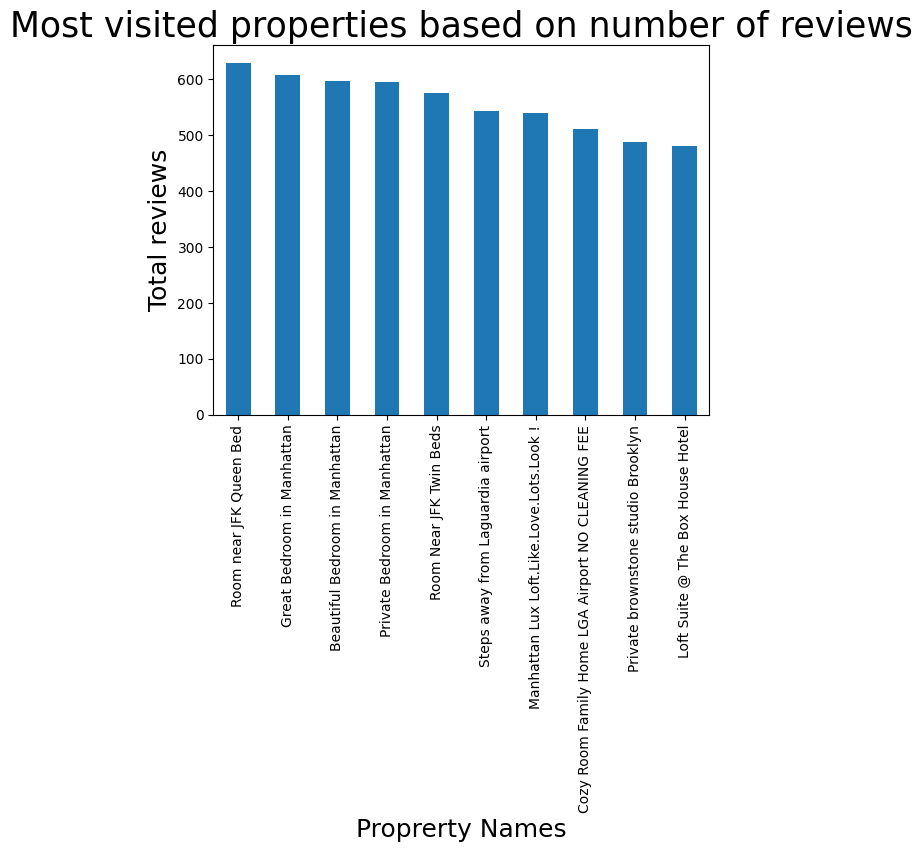

In [ ]:
most_visited.plot(kind='bar')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15,10)
plt.title('Most visited properties based on number of reviews', fontsize = 25)
plt.xlabel('Proprerty Names', fontsize = 18)
plt.ylabel('Total reviews', fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

**Top 3 properties visited by People based on number of reviews are :**

**1. Private Bedroom in Manhattan**

**2. Room near JFK Queen Bed**

**3. Beautiful Bedroom in Manhattan**

##### **Thinking like a data scientist, workingfor property developers gaints like Brigade Group or Godrej Properties and Iam asked to solve Question like:**

### **11. can you check who has the potential to open an AirBnb franchise in Queens in coming days, consider the most number of reviews as metric?**

In [ ]:
booking_df1.head(3)

name  host_id  host_name  \
0   Clean & quiet apt home by the park     2787       John   
1                Skylit Midtown Castle     2845   Jennifer   
2  THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   

   price  minimum_nights  number_of_reviews   last_review  reviews_per_month  \
0  149.0             1.0                9.0    2018-10-19               0.21   
1  225.0             1.0               45.0    2019-05-21               0.38   
2  150.0             3.0                0.0  Not_Revieved               0.00   

   calculated_host_listings_count  availability_365  
0                             6.0             365.0  
1                             2.0             355.0  
2                             1.0             365.0

In [ ]:
booking_df1.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

In [ ]:
booking_df1['last_review'] = pd.to_datetime(booking_df1['last_review'], errors='coerce')

In [ ]:
property_df = booking_df1.copy()
property_df['duration'] = round((property_df['number_of_reviews']/property_df['reviews_per_month']) / 12)
property_df['possible_year_of_start'] = property_df['last_review'].dt.year - property_df['duration']
property_df['possible_year_of_start'] = pd.to_datetime(property_df['possible_year_of_start'], format = '%Y').dt.year

In [ ]:
num_of_property_df = booking_df1.loc[:,['host_id','host_name']].groupby('host_id').agg({'host_name':'count'}).sort_values(by='host_name',ascending=False).rename(columns={'host_name':'number_of_property'})

In [ ]:
booking_df1.groupby('host_id').agg({'host_name':'count'}).sort_values(by='host_name',ascending=False).rename(columns={'host_name':'number_of_property'})

number_of_property
host_id                      
30283594                  109
16098958                   71
22541573                   66
61391963                   57
7503643                    50
...                       ...
7239405                     1
7240751                     1
7241674                     1
7243674                     1
121096858                   1

[18461 rows x 1 columns]

In [ ]:
#DataFrame to caputure the data for total number of property holding of Hosts in reviewed_df

num_of_property_df = property_df.groupby('host_id').agg({'host_name':'count'}).sort_values(by='host_name',ascending=False).rename(columns={'host_name':'number_of_property'})
df = property_df.copy()
property_df = df.merge(num_of_property_df,how='inner',on='host_id')

In [ ]:
property_df.head()

name  host_id host_name  \
0                 Clean & quiet apt home by the park     2787      John   
1  Riomaggiore Room. Queen Bedroom in Bklyn Townh...     2787      John   
2                               Torre del Lago Room.     2787      John   
3  Cinque Terre Room.  Clean and Quiet Queen Bedroom     2787      John   
4  La Spezia room.  Clean, quiet and comfortable bed     2787      John   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0            Brooklyn    Kensington  40.64749  -73.97237  Private room  149.0   
1            Brooklyn   Bensonhurst  40.60951  -73.97622  Private room   99.0   
2            Brooklyn     Gravesend  40.60755  -73.97410  Private room   79.0   
3            Brooklyn     Gravesend  40.60810  -73.97541  Private room  149.0   
4            Brooklyn   Bensonhurst  40.60951  -73.97642   Shared room   79.0   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             1.0                9.0  2018-10-19               0.21   
1             1.0               21.0  2018-10-27               0.50   
2             1.0               17.0  2019-06-26               0.40   
3             1.0               24.0  2019-05-11               0.64   
4             1.0               15.0  2018-09-29               0.43   

   calculated_host_listings_count  availability_365  duration  \
0                             6.0             365.0       4.0   
1                             6.0             153.0       4.0   
2                             6.0             174.0       4.0   
3                             6.0             180.0       3.0   
4                             6.0             180.0       3.0   

   possible_year_of_start  number_of_property  
0                  2014.0                   6  
1                  2014.0                   6  
2                  2015.0                   6  
3                  2016.0                   6  
4                  2015.0                   6

In [ ]:
busiest_host_queens = property_df.loc[property_df.neighbourhood_group=='Queens',['host_id','host_name','number_of_property','reviews_per_month','availability_365','price']].groupby(['host_id','host_name']).agg({'reviews_per_month':'sum','number_of_property':'count','availability_365':'median','price':'min'}).sort_values(by=['reviews_per_month','number_of_property','availability_365'],ascending=[False,False,False]).reset_index()[:20]
busiest_host_queens

host_id         host_name  reviews_per_month  number_of_property  \
0    37312959              Maya              53.53                   5   
1    26432133          Danielle              44.03                   3   
2    58391491              Juel              36.96                   4   
3    47621202              Dona              27.98                   2   
4    23591164            Angela              23.38                   4   
5    22959695   Gurpreet  Singh              21.19                   3   
6    65809485           Shirley              20.68                  12   
7    17638424            Sophie              20.44                   8   
8    27673980               Amy              18.88                   8   
9    55125246            Yvonne              18.67                   2   
10  119592255             Kevin              18.06                   2   
11   69427329  Michelle & Eddie              17.72                   5   
12   20134231          Paulette              15.41                   3   
13   62843071   Kevin And Kitty              14.41                   3   
14   45416627            Lolita              13.63                   5   
15    2680820             Linda              13.28                   3   
16    9284163           Antonio              13.21                   3   
17  111841534            Malini              13.15                   1   
18   84607966            Nurcan              13.11                   3   
19   97086824           Miss Dy              12.84                   1   

    availability_365  price  
0              163.0   32.0  
1              341.0   48.0  
2              154.5   33.0  
3              253.0   47.0  
4              321.5   65.0  
5                0.0   50.0  
6              146.5   40.0  
7              159.0   30.0  
8               71.5   50.0  
9              169.5   65.0  
10             355.0   45.0  
11             255.0   49.0  
12             352.0   40.0  
13             278.0   38.0  
14             311.0   45.0  
15             322.0   55.0  
16             311.0   29.0  
17              71.0   53.0  
18             322.0   45.0  
19             102.0   49.0

In [ ]:
property_df['year_of_review'] = property_df['last_review'].dt.year

In [ ]:
# Which neighbourhood is has incremental reviews YoY for Queens

dct1 = {}

for group in property_df.loc[property_df.neighbourhood_group=='Queens'].neighbourhood.unique():
  lst1 = []
  for year in list(range(2014, 2020)):
    avg_reviews_sum = property_df[(property_df['neighbourhood'] == group) & (property_df['year_of_review'] == year)]['reviews_per_month'].sum()
    lst1.append(avg_reviews_sum)
  dct1.update({group : lst1})
dct1
avg_review_df = pd.DataFrame(dct1, index=range(2014,2020))
avg_review_df

Long Island City  Woodside  Flushing  Sunnyside  Ridgewood  \
2014              0.45      0.00      0.00       0.18       0.00   
2015              1.96      0.07      0.02       0.55       1.73   
2016              3.75      0.37      0.83       1.99       0.68   
2017              3.24      1.29      6.36       2.35       3.61   
2018              8.67      3.08      1.81       6.16       6.74   
2019            156.62     61.51    157.86     129.10     105.75   

      Middle Village  Jamaica  Ditmars Steinway  Astoria  Queens Village  ...  \
2014            0.00     0.00              0.08     0.25            0.00  ...   
2015            0.31     0.00              0.06     1.68            0.00  ...   
2016            0.02     0.03              1.75     7.06            0.00  ...   
2017            0.00     4.98              2.54     9.41            0.14  ...   
2018            0.14     3.17              4.59    21.04            0.00  ...   
2019           13.66   139.46            104.27   273.95           20.22  ...   

      Edgemere  South Ozone Park  Corona  Neponsit  Laurelton  Holliswood  \
2014      0.00              0.00    0.00      0.00       0.00        0.00   
2015      0.00              0.00    0.00      0.00       0.00        0.00   
2016      0.00              0.00    0.00      0.00       0.00        0.00   
2017      0.04              0.00    0.52      0.00       0.00        0.00   
2018      0.00              6.83    2.78      0.00       1.22        0.00   
2019      3.45             11.22   20.06      2.88       4.90        0.83   

      Rosedale  Jamaica Hills  Hollis  Douglaston  
2014      0.00            0.0     0.0         0.0  
2015      0.00            0.0     0.0         0.0  
2016      0.23            0.0     0.0         0.0  
2017      0.52            0.0     0.0         0.0  
2018      3.52            0.5     0.0         0.0  
2019      9.17            0.0     0.0         1.7  

[6 rows x 49 columns]

In [ ]:
# Top 10 reviewed in Queens

avg_review_queens = avg_review_df.sum().sort_values(ascending=False)[:10].reset_index().rename(columns = {'index' : 'Properties Names', 0 : 'Average Reviews'})
avg_review_queens

Properties Names  Average Reviews
0           Astoria           313.39
1     East Elmhurst           226.31
2  Long Island City           174.69
3          Flushing           166.88
4           Jamaica           147.64
5         Sunnyside           140.33
6         Ridgewood           118.51
7  Ditmars Steinway           113.29
8          Elmhurst            86.89
9   Jackson Heights            74.52

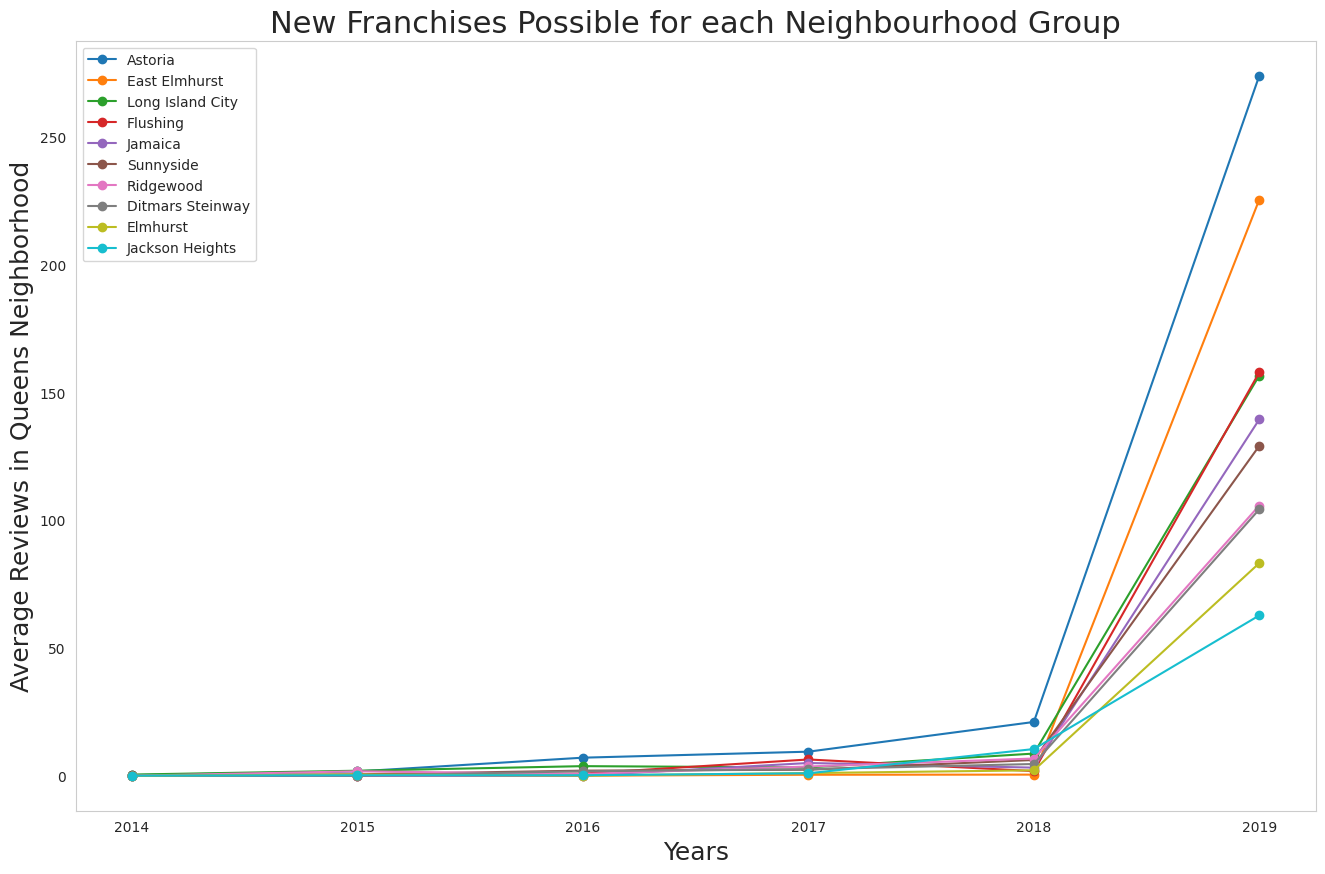

In [ ]:
plt.rcParams['figure.figsize'] = (16,10)
sns.set_style('whitegrid')
for average in avg_review_queens['Properties Names']:
  avg_review_df[average].plot(marker='o')
plt.xlabel('Years', fontsize = 18)
plt.ylabel('Average Reviews in Queens Neighborhood', fontsize = 18)
plt.title('New Franchises Possible for each Neighbourhood Group', fontsize = 22)
plt.locator_params(axis="y", nbins=10)
plt.grid()
plt.legend(loc='upper left')
plt.show()

**We observe that top reviewed neighbourhoods are :**

**Astoria** with average reviews of               901.27

**East Elmhurst** with average reviews of         824.73

**Flushing** with average reviews of              819.85

**Long Island City** with average reviews of      615.86

**Jamaica**  with average reviews of              604.56

**Ridgewood**  with average reviews of            430.54

**Sunnyside**  with average reviews of            413.95

**Ditmars Steinway**  with average reviews of     372.97

**Springfield Gardens** with average reviews of   356.42

**Elmhurst**         with average reviews of      318.89
    

**So, The Hosts with property listings over these neighbourhoods of Queens are more likely to have a new franchise in the near future.**

### **12.can you check who has the potential to open an AirBnb franchise in Manhattan in coming days, consider there most number of reviews as metric?**

In [ ]:
busiest_host_manhattan = property_df.loc[property_df.neighbourhood_group=='Manhattan',['host_id','host_name','reviews_per_month','number_of_property','availability_365','price']].groupby(['host_id','host_name']).agg({'reviews_per_month':'sum','number_of_property':'count','availability_365':'median','price':'min'}).sort_values(by=['reviews_per_month','number_of_property','availability_365'],ascending=[False,False,False]).reset_index()[:20]
busiest_host_manhattan

host_id          host_name  reviews_per_month  number_of_property  \
0    35524316       Yasu & Akiko              40.32                  11   
1    16677326     Alex And Zeena              36.31                  11   
2    59529529                Han              34.78                   6   
3     4734398                 Jj              23.04                   3   
4     8715723              Jacob              17.86                   4   
5     7831209               Bobi              16.85                   6   
6    64471880              Jaleh              16.54                   2   
7    51850937                Joe              15.16                   3   
8    25517905           Andreias              13.39                   3   
9    10661558                Gio              12.82                   3   
10   61391963  Corporate Housing              12.57                  57   
11   47993495               Mama              12.32                   4   
12     216227             Victor              12.20                   2   
13   31626212               Troy              11.70                   5   
14    8338942             Victor              11.46                   4   
15  114477998            Marilyn              11.44                   2   
16  104926837              Julia              11.42                   3   
17   26856159             Glenda              11.39                   3   
18    7558452                Zev              10.72                   2   
19   19331457            Yevgeny              10.64                   2   

    availability_365  price  
0              245.0  155.0  
1              352.0   85.0  
2              172.0   70.0  
3              339.0   49.0  
4              222.5  118.0  
5              361.0   45.0  
6               48.5   87.0  
7              252.0   85.0  
8              253.0   99.0  
9              148.0  119.0  
10             281.0  109.0  
11             149.5   60.0  
12             295.0   60.0  
13             248.0  100.0  
14              58.5   65.0  
15             207.0   65.0  
16              12.0  113.0  
17             274.0   42.0  
18             242.5  260.0  
19             270.5   95.0

In [ ]:
dct1 = {}

for group in property_df.loc[property_df.neighbourhood_group=='Manhattan'].neighbourhood.unique():
  lst1 = []
  for year in list(range(2012, 2020)):
    avg_reviews_sum = property_df[(property_df['neighbourhood'] == group) & (property_df['year_of_review'] == year)]['reviews_per_month'].sum()
    lst1.append(avg_reviews_sum)
  dct1.update({group : lst1})
dct1
avg_review_df = pd.DataFrame(dct1, index=range(2012,2020))
avg_review_df

Midtown   Harlem  East Harlem  Murray Hill  Hell's Kitchen  \
2012     0.00     0.40         0.00         0.00            0.00   
2013     0.00     0.04         0.01         0.00            0.13   
2014     0.06     0.23         0.09         0.05            0.47   
2015     2.35     5.34         1.73         1.03            2.33   
2016     9.30    19.03        10.03         2.11            8.76   
2017    13.58    30.85         9.63         3.37           25.58   
2018    21.28    95.66        33.28         4.54           44.31   
2019   234.88  1087.03       512.62        40.82          595.01   

      Upper West Side  Chinatown  Lower East Side  West Village  Chelsea  ...  \
2012             0.01       0.00             0.00          0.10     0.00  ...   
2013             0.45       0.00             0.02          0.12     0.00  ...   
2014             0.57       0.61             0.64          0.10     0.46  ...   
2015             7.40       0.46             2.39          1.92     2.15  ...   
2016            22.01       2.60             8.56          9.83    10.36  ...   
2017            23.18       6.99            13.42          8.72    14.83  ...   
2018            50.30      19.41            19.39         28.72    18.72  ...   
2019           443.74     134.32           344.42        193.91   369.35  ...   

      Little Italy  Nolita  Two Bridges  Gramercy  Theater District  Tribeca  \
2012          0.00    0.00         0.00      0.00              0.00     0.00   
2013          0.00    0.26         0.00      0.07              0.00     0.00   
2014          0.00    0.00         0.00      0.04              0.02     0.73   
2015          0.28    0.56         0.00      0.89              0.30     0.48   
2016          0.15    2.00         0.29      3.23              0.36     0.80   
2017          0.38    4.01         0.19      3.25              2.84     3.17   
2018          3.08    9.39         1.45      8.68              1.90     1.71   
2019         28.12   74.65        32.91    105.48             52.50    30.82   

      Battery Park City  Civic Center  Stuyvesant Town  Marble Hill  
2012               0.00          0.00             0.00         0.00  
2013               0.00          0.00             0.00         0.00  
2014               0.03          0.00             0.00         0.00  
2015               0.56          0.05             0.00         0.02  
2016               0.80          1.01             0.08         0.16  
2017               1.28          1.38             0.70         0.00  
2018               0.00          0.41             0.00         0.00  
2019               4.66          4.80             3.72         1.18  

[8 rows x 32 columns]

In [ ]:
avg_review_manhattan = avg_review_df.sum().sort_values(ascending=False)[:10].reset_index().rename(columns = {'index' : 'Properties Names', 0 : 'Average Reviews'})
avg_review_manhattan

Properties Names  Average Reviews
0              Harlem          1238.58
1      Hell's Kitchen           676.59
2        East Village           670.45
3         East Harlem           567.39
4     Upper West Side           547.66
5     Upper East Side           493.49
6             Chelsea           415.87
7     Lower East Side           388.84
8             Midtown           281.45
9  Washington Heights           279.28

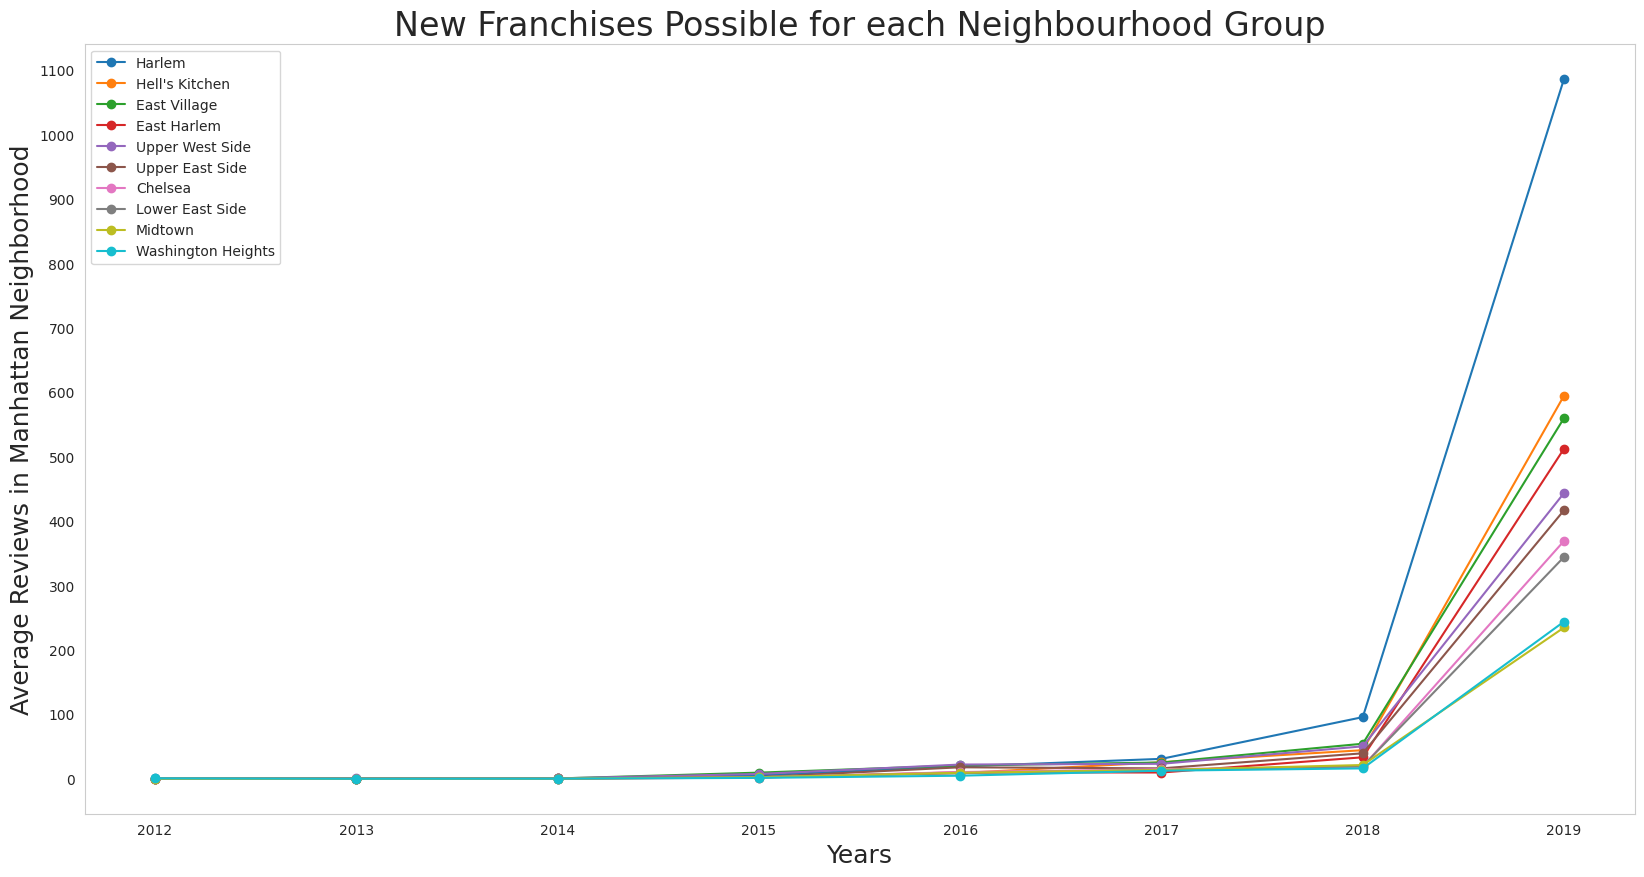

In [ ]:
plt.rcParams['figure.figsize'] = (20,10)
sns.set_style('whitegrid')
for average in avg_review_manhattan['Properties Names']:
  avg_review_df[average].plot(marker='o')
plt.xlabel('Years', fontsize = 18)
plt.ylabel('Average Reviews in Manhattan Neighborhood', fontsize = 18)
plt.title('New Franchises Possible for each Neighbourhood Group', fontsize = 24)
plt.locator_params(axis="y", nbins=20)
plt.grid()
plt.legend(loc='upper left')
plt.show()

**We observe that top reviewed neighbourhoods are :**

**Harlem** with average reviews of                2956.23

**Hell's Kitchen** with average reviews of        2818.79

**East Village** with average reviews of          1668.17

**East Harlem** with average reviews of           1579.06

**Upper East Side** with average reviews of       1523.66

**Upper West Side** with average reviews of       1487.27

**Midtown** with average reviews of               1264.09

**Chelsea** with average reviews of               1038.89

**Lower East Side** with average reviews of        919.93

**Washington Heights** with average reviews of     876.70

**So, The Hosts with property listings over these neighbourhoods of Manhattan are more likely to have a new franchise in the near future.**

### **13. Plot the Airbnb Spatial Data on New York City Map**

In [ ]:
Box = (booking_df1.longitude.min(), booking_df1.longitude.max(), booking_df1.latitude.min(), booking_df1.latitude.max())

In [ ]:
new_york_city_map = plt.imread('/content/drive/MyDrive/AIRBNB EDA/NY map.PNG')

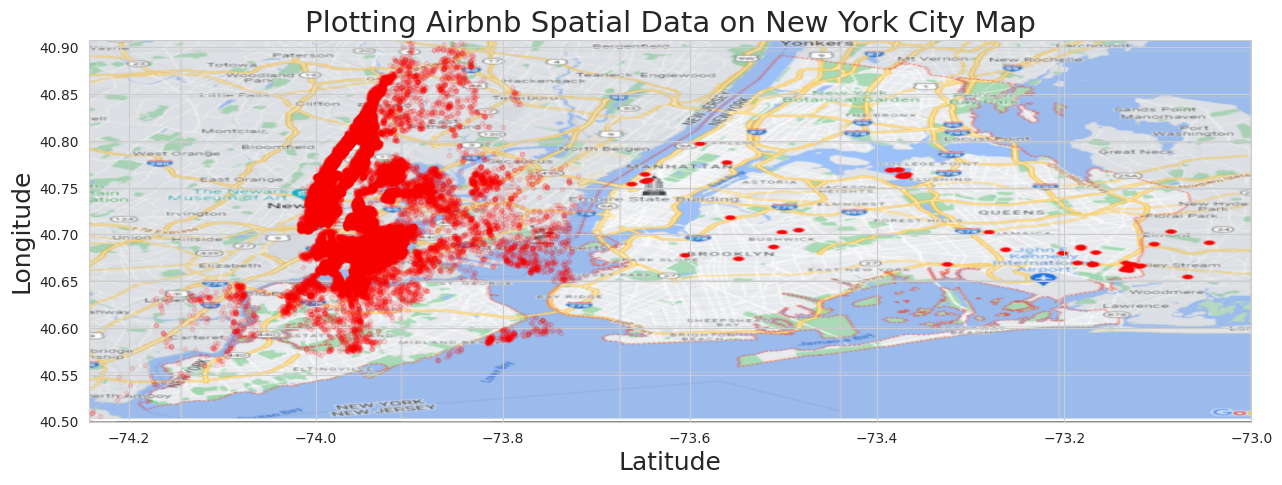

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(booking_df1.longitude, booking_df1.latitude, zorder=1, alpha= 0.1, c='red', s=10)
ax.set_title('Plotting Airbnb Spatial Data on New York City Map', fontsize = 21)
plt.xlabel('Latitude', fontsize = 18)
plt.ylabel('Longitude', fontsize = 18)
ax.set_xlim(Box[0],Box[1])
ax.set_ylim(Box[2],Box[3])
ax.imshow(new_york_city_map, zorder=0, extent = Box, aspect = 'equal')
plt.show()

**The above Map shows all the Airbnb Properties of the dataset in New York City.**

### **14. Plot the 50 Busiest Airbnb properties on the New York City Map**

In [ ]:
Busiest_50_df = booking_df1.sort_values('reviews_per_month',ascending=False, inplace=False).head(50)
Busiest_50_df.head()

name   host_id host_name  \
20403  Cozy Room Family Home LGA Airport NO CLEANING FEE  26432133  Danielle   
11759                            Room near JFK Queen Bed  47621202      Dona   
21517   Sun Room Family Home LGA Airport NO CLEANING FEE  26432133  Danielle   
21879                Private bedroom 8 mins-JFK&The Mall  55125246    Yvonne   
7086   Comfy Room Family Home LGA Airport NO CLEANING...  26432133  Danielle   

      neighbourhood_group  neighbourhood  latitude  longitude     room_type  \
20403              Queens  East Elmhurst  40.76335  -73.87007  Private room   
11759              Queens        Jamaica  40.66730  -73.76831  Private room   
21517              Queens  East Elmhurst  40.76367  -73.87088  Private room   
21879              Queens        Jamaica  40.68638  -73.79007  Private room   
7086               Queens  East Elmhurst  40.76374  -73.87103  Private room   

       price  minimum_nights  number_of_reviews last_review  \
20403   48.0             1.0              510.0  2019-07-06   
11759   47.0             1.0              629.0  2019-07-05   
21517   48.0             1.0              417.0  2019-07-07   
21879   65.0             1.0              347.0  2019-07-06   
7086    54.0             1.0              430.0  2019-07-03   

       reviews_per_month  calculated_host_listings_count  availability_365  
20403              16.22                             5.0             341.0  
11759              14.58                             2.0             333.0  
21517              14.36                             5.0             338.0  
21879              13.48                             3.0             159.0  
7086               13.45                             5.0             347.0

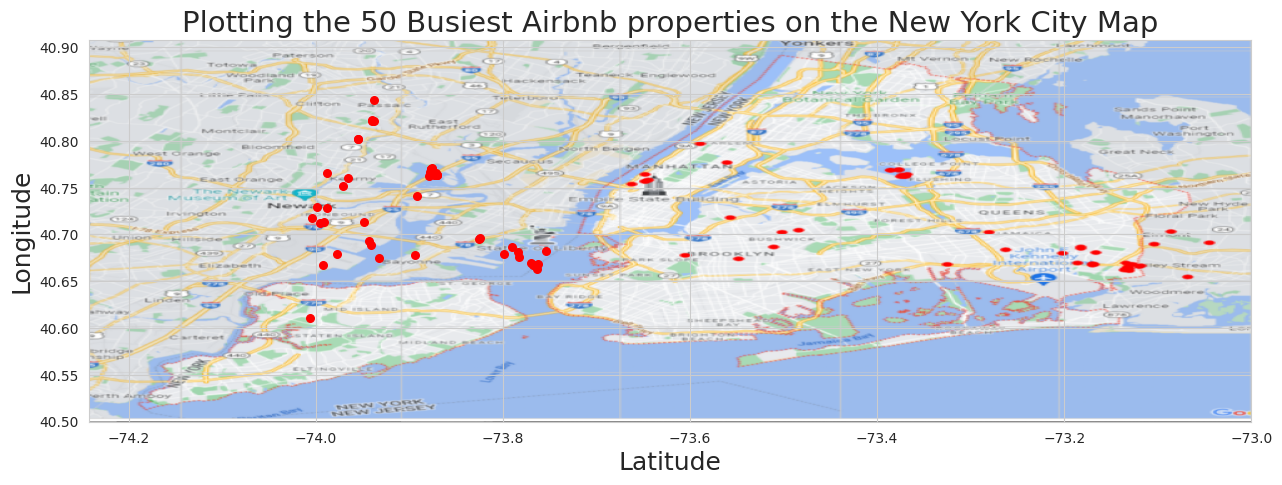

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(Busiest_50_df.longitude, Busiest_50_df.latitude, zorder=1, alpha= 1, c='red', s=30)
ax.set_title('Plotting the 50 Busiest Airbnb properties on the New York City Map', fontsize = 21)
plt.xlabel('Latitude', fontsize = 18)
plt.ylabel('Longitude', fontsize = 18)
ax.set_xlim(Box[0],Box[1])
ax.set_ylim(Box[2],Box[3])
ax.imshow(new_york_city_map, zorder=0, extent = Box, aspect= 'equal')
plt.show()

**The above Map shows the top 50 Busiest Airbnb properties in the New York City**

### **15. Plot the top 1000 Airbnb properties that are most visited by people in New York City Map**

In [ ]:
most_visited_map = booking_df1.groupby(['name'])['number_of_reviews'].sum().sort_values(ascending=False)[:1000]
most_visited_map.index.rename('Property Names', inplace=True)
most_visited_map.head(10)

Property Names
Room near JFK Queen Bed                              629.0
Great Bedroom in Manhattan                           607.0
Beautiful Bedroom in Manhattan                       597.0
Private Bedroom in Manhattan                         594.0
Room Near JFK Twin Beds                              576.0
Steps away from Laguardia airport                    543.0
Manhattan Lux Loft.Like.Love.Lots.Look !             540.0
Cozy Room Family Home LGA Airport NO CLEANING FEE    510.0
Private brownstone studio Brooklyn                   488.0
Loft Suite @ The Box House Hotel                     481.0
Name: number_of_reviews, dtype: float64

**The above Data shows The top 1000 Airbnb properties that are most visited by people in New York City**


**The properties with the highest number of reviews are diverse and span across multiple locations in New York City.
 Topping the list is "Room near JFK Queen Bed" with 629 reviews,
  followed closely by "Great Bedroom in Manhattan"
   and "Beautiful Bedroom in Manhattan" with 607 and 597 reviews, respectively.**


***CONCLUSION***



We have performed a detailed EDA on the AIRBNB DATA of New York City for the year of 2019, and Reached to the conclusions seen above in the project.